In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy.stats import norm
%matplotlib inline

##  Emprical Distribution of Sample Mean 


We want to take a sample with sample size $n=30$ from a normal population with $\mu=10$ and $\sigma=5$. 

Our target is to check the variation of sampling error 
$$\bar{x}-\mu $$

and finally figure our the distribution of 
$$
\bar{x}
$$

With distribution of sample mean, we can figure out how accurate to estimate population mean using sample mean, or what the chance that the population mean locates in a interval centered at sample mean,  which are the topic of next section,  estimation. 

We take the first sample, 

In [19]:
Fstsample=pd.DataFrame(np.random.normal(10,5,size=30))
print ("sample mean is ",Fstsample[0].mean())
print ("sample SD is ",Fstsample[0].std(ddof=1)) 

sample mean is  9.565159745164573
sample SD is  4.776758039061961


If we run the cell above several time, the values we draw are changed, so are the mean and the standard deviation of the sample. This is called **"variation of the sample"**. 

We will focus on the variation of sample mean in this section. Next we use for-loop to generate 10000 samples. For each sample, we compute mean and standard deviation.  We save all sample means and stds in DataFrame "collection"

In [33]:
meanlist=[]
varlist=[]
for t in range(10000):
    sample=pd.DataFrame(normal(10,5,size=30))
    meanlist.append(sample[0].mean())
    varlist.append(sample[0].var(ddof=1))
    
collection=pd.DataFrame()
collection['meanlist']=meanlist
collection['varlist']=varlist

We will get a empirical distribution using normed histogram,which is normal-like. 

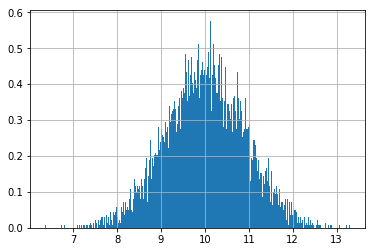

In [34]:
collection['meanlist'].hist(bins=500, normed=1)

Similarly we can find the empirical distribution of sample variance, which is not normal-like.

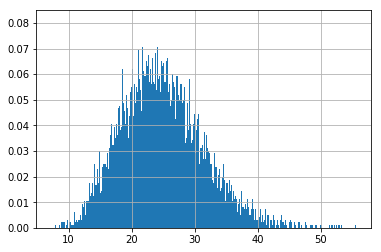

In [30]:
collection['varlist'].hist(bins=500, normed=1)

In fact, the distribution of sample variance is chi-2

## Sample from Normal Population

From the discussion above, we know that 

- $\bar{x}$ is a random variable 
- empirical distribution of $\bar{x}$ (Finite observation) looks like a normal distribution.  

**Random variable $\bar{x}$ obtained from a normal population is gain a normal random variable.**

Get obtain probability about sample mean, we need to know the mean  and standard deviation of $\bar{x}$. To gain some insights, we plot histogram of large sample from population (whose distribution is similar to that of population) and emprirical distribution of sample mean in one graph. 

In [35]:
pop=pd.DataFrame(normal(10,5,size=100000))

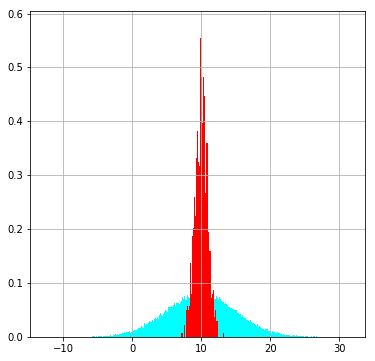

In [47]:
plt.figure(figsize=(6,6))
pop[0].hist(bins=500,color='cyan',normed=1)
collection['meanlist'].hist(bins=500, normed=1,color='red')
plt.show()

We can find out that means of popualtion and sample mean are the **same** but the distribution of sample mean has a **smaller** standard deviation. We can conclude: 

** Randomly select a sample with sample size n from a normal population ($\mu,\sigma^2$), the sample mean's distribution is normal with mean equal to population mean $\mu$ and  variance equal to $\frac{\sigma^2}{n}$ **

**Proof:** omitted. 


**Practice:** Find the mean and standard deviation of  monthly average log return of apple.  

In [44]:
aapl=pd.DataFrame.from_csv("data/apple.csv")
aapl['logReturn']=np.log(aapl['Close'].shift(-1))-np.log(aapl['Close'])
mu=aapl['logReturn'].mean()
var=aapl['logReturn'].var(ddof=1)
print(mu,var)

0.000975467759150088 0.0004018199701199854


mean and var are the sample mean and variance of daily log return. We take them as population mean and standard deviation of daily return. Average monthly return is like to sample from this population with sample size=20(20 trading days).

In [43]:
mean_sample_mean=mu
variance_sample_mean=var/20
std_sample_mean=variance_sample_mean**0.5 
# we   compute variance first and then compute std by taking square root. 
print(mean_sample_mean,variance_sample_mean,std_sample_mean)

0.000975467759150088 2.009099850599927e-05 0.004482298350846279


**Practice:** What is chance that monthly average log return of apple is positive?

In [46]:
1-norm.cdf(0,mean_sample_mean,std_sample_mean)

0.5861400068449778

##  Sample from More General Population

If we take samples from population which is not normal, what is the distribution of sample mean? Is that still normal?

Consider the following population 


In [48]:
apop=pd.DataFrame([1,0,1,0,1])

Now we take samples with replacement and sample size=10. 

In [56]:
samplemeanlist=[]
for t in range(100000):
    sample=apop[0].sample(10,replace=True)
    samplemeanlist.append(sample.mean())

    
acollec=pd.DataFrame()
acollec['meanlist']=samplemeanlist


Then we can find distribution of sample mean 

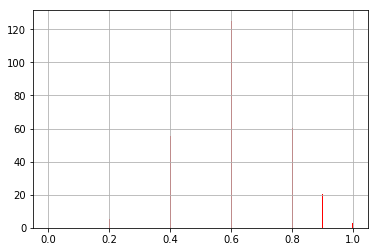

In [57]:
acollec['meanlist'].hist(bins=500,color='red',normed=1)
plt.show()

which obviously is not normal. Now let us take samples with sample size=2000

In [68]:
samplemeanlist=[]
for t in range(10000):
    sample=apop[0].sample(2000,replace=True)
    samplemeanlist.append(sample.mean())

    
acollec=pd.DataFrame()
acollec['meanlist']=samplemeanlist


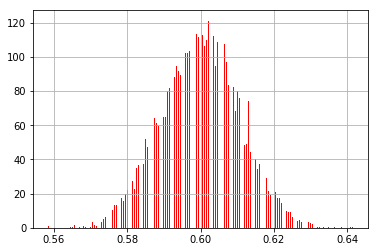

In [69]:
acollec['meanlist'].hist(bins=500,color='red',normed=1)
plt.show()

Now we have s distribution which looks like a normal one, which is because of central limit theorem. 

**Central Limit Theroem**
No matter what is the population, $\bar{X}$ will be more and more like normal distribution as $n$ becomes larger, and its mean and variance are $\mu$ and $\frac{\sigma^2}{n}$

'apop' is a population with only two possible values. For most population with continuous values and almost-symmetric distributed, its sample mean will have normal-like distribution if $n>50$.  

Central limit theorem did not provide the result the suitable sample size with which the sample mean can be normal like, which is highly dependent on the the distribution of population. 